## Libraries <a class="anchor" id="zero-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data set cleaning <a class="anchor" id="first-bullet"></a>

Read the data set <a class="anchor" id="read_data"></a>

In [3]:
df_churn = pd.read_csv('hb2_d1churn_activities.csv')
df_retain = pd.read_csv('hb2_d1reatin_activities.csv')

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
userid                        100000 non-null object
retainStatus                  100000 non-null int64
isFromReferral                100000 non-null int64
isFBConnected                 100000 non-null int64
isGCConnected                 100000 non-null int64
isAllAcountsConnected         100000 non-null int64
level                         100000 non-null int64
stadium                       100000 non-null int64
sessionCount                  100000 non-null int64
TotaliAP                      100000 non-null int64
TotalSpend                    100000 non-null float64
DiamondSink                   100000 non-null int64
GoldSink                      100000 non-null int64
DiamondSource                 100000 non-null int64
GoldSource                    100000 non-null int64
NumberOfMatches               100000 non-null int64
notEnoughEnergy               100000 non-null int64
not

In [5]:
df_retain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 51 columns):
userid                        300000 non-null object
retainStatus                  300000 non-null int64
isFromReferral                300000 non-null int64
isFBConnected                 300000 non-null int64
isGCConnected                 300000 non-null int64
isAllAcountsConnected         300000 non-null int64
level                         300000 non-null int64
stadium                       300000 non-null int64
sessionCount                  300000 non-null int64
TotaliAP                      300000 non-null int64
TotalSpend                    300000 non-null float64
DiamondSink                   300000 non-null int64
GoldSink                      300000 non-null int64
DiamondSource                 300000 non-null int64
GoldSource                    300000 non-null int64
NumberOfMatches               300000 non-null int64
notEnoughEnergy               300000 non-null int64
no

#### Data sets are not balanced and datasets have misssing values

In [6]:
df_churn = df_churn.dropna()
df_retain_sample = df_retain.dropna()
df_retain_sample = df_retain.sample(frac=0.332,random_state=42).reset_index(drop=True)
df = df_churn.append(df_retain_sample, ignore_index=True)
df = df.dropna()

In [7]:
df.describe()

,retainStatus,isFromReferral,isFBConnected,isGCConnected,isAllAcountsConnected,level,stadium,sessionCount,TotaliAP,TotalSpend,...,cardPackageOpen,charPackGachaPurchase,superCharPackGachaPurchase,goldGachaPurchase,powerCardPackagePurchase,scratchCard,videoproduct,CollectedCharacter,numberOfSocialShare,TeamStatus
count,198862.000000,198862.0,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,...,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000,198862.000000
mean,0.499713,0.0,0.020331,0.211332,0.029960,3.981439,1.492593,2.876427,0.012033,0.030833,...,2.902711,0.017766,0.021095,0.326287,0.241383,0.212318,0.088846,0.061887,0.114748,0.128687
std,0.500001,0.0,0.141129,0.408255,0.170479,2.151832,0.663491,2.671761,0.191677,0.832089,...,2.417706,0.185003,0.333325,1.042556,0.924349,0.845481,0.421298,0.491633,0.473221,0.334854
min,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,0.000000,0.000000,0.000000,5.000000,2.000000,4.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,22.000000,6.000000,72.000000,18.000000,153.857677,...,113.000000,15.000000,34.000000,69.000000,67.000000,48.000000,16.000000,36.000000,54.000000,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['retainStatus'],label="Sum")

plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
df['location'] = df['userid'].apply(lambda x: x[9:])

Remove userid column

In [10]:
df.drop(df.columns[0], axis=1, inplace=True)

In [11]:
df.head()

,retainStatus,isFromReferral,isFBConnected,isGCConnected,isAllAcountsConnected,level,stadium,sessionCount,TotaliAP,TotalSpend,...,charPackGachaPurchase,superCharPackGachaPurchase,goldGachaPurchase,powerCardPackagePurchase,scratchCard,videoproduct,CollectedCharacter,numberOfSocialShare,TeamStatus,location
0,0,0,0,0,0,2,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,ar
1,0,0,0,0,0,2,1,1,0,0.0,...,0,0,0,0,0,0,0,1,0,br
2,0,0,0,0,0,2,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,tr
3,0,0,0,0,0,3,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,ro
4,0,0,0,0,0,4,1,2,0,0.0,...,0,0,1,0,0,0,0,0,1,fr


#### The location of players somewhat corrolates with churn rate

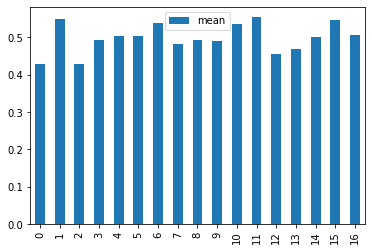

In [12]:
df.groupby('location')['retainStatus'].agg(['mean']).reset_index().plot(kind='bar')

#### Let's take a look at the columns more closely

In [13]:

compare = df.copy()
del compare['retainStatus']

for i in compare.columns:
    df_plot = df.groupby(i)['retainStatus'].agg(['mean','count']).reset_index()
    #df_plot.plot(kind='bar')
    print(df_plot)
    print('------------------------------------')

   isFromReferral      mean   count
0               0  0.499713  198862
------------------------------------
   isFBConnected      mean   count
0              0  0.496389  194819
1              1  0.659906    4043
------------------------------------
   isGCConnected      mean   count
0              0  0.467622  156836
1              1  0.619474   42026
------------------------------------
   isAllAcountsConnected      mean   count
0                      0  0.493536  192904
1                      1  0.699731    5958
------------------------------------
    level      mean  count
0       2  0.326872  56129
1       3  0.428728  51191
2       4  0.537665  30625
3       5  0.617433  22911
4       6  0.678290  14339
5       7  0.729770   8774
6       8  0.777311   4998
7       9  0.814331   3824
8      10  0.856483   2599
9      11  0.878009   1828
10     12  0.905681    933
11     13  0.920455    440
12     14  0.948052    154
13     15  0.984127     63
14     16  0.903226     31
15     17

#### isFromReferral column contains only 1 value

In [14]:
del df['isFromReferral']

#### Create dummy variables for the location column

In [15]:
df = pd.get_dummies(df, columns=['location'])

In [16]:
df.head()

,retainStatus,isFBConnected,isGCConnected,isAllAcountsConnected,level,stadium,sessionCount,TotaliAP,TotalSpend,DiamondSink,...,location_it,location_jp,location_mena,location_nl,location_oth,location_ro,location_ru,location_tr,location_uk,location_us
0,0,0,0,0,2,1,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,1,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,1,1,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,3,1,1,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,4,1,2,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shuffle the data

In [17]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [18]:
df.dropna()

,retainStatus,isFBConnected,isGCConnected,isAllAcountsConnected,level,stadium,sessionCount,TotaliAP,TotalSpend,DiamondSink,...,location_it,location_jp,location_mena,location_nl,location_oth,location_ro,location_ru,location_tr,location_uk,location_us
0,0,0,0,0,2,1,1,0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,4,1,1,0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,3,1,1,0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,5,2,2,0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,13,4,9,0,0.00,-64,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198857,1,0,0,0,3,1,1,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
198858,1,0,0,0,5,2,1,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
198859,1,0,1,0,13,3,3,4,19.96,-715,...,0,0,0,0,0,0,0,0,0,1
198860,1,0,0,0,2,1,1,0,0.00,0,...,0,0,0,0,0,0,0,1,0,0


## Testing algorithms <a class="anchor" id="second-bullet"></a>

### Data set without dimensionality reduction
### Dimensionality reduction:

### Correlation coefficient score
### Voting classifier
### Linear SVC + SelectFromModel
### Linear SVC + RFECV
### Tree-based feature selection
#### Classifiers:

* Logistic Regression
* Decision Tree
* XGBoost
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Random Forest
* K-Nearest Neighbors
* Naive Bayes

#### Scoring:

* precision score
* recall score
* F1 score
* support score
* accuracy score
* AUC/ROC

## Withouth reduction <a class="anchor" id="without_red"></a>

#### Remove outliers

In [19]:
from scipy import stats
df_out = df[(np.abs(stats.zscore(df)) < 10).all(axis=1)]

#### Normalize data

In [20]:
df_norm=(df_out-df_out.min())/(df_out.max()-df_out.min())

In [21]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195044 entries, 0 to 198860
Data columns (total 66 columns):
retainStatus                  195044 non-null float64
isFBConnected                 195044 non-null float64
isGCConnected                 195044 non-null float64
isAllAcountsConnected         195044 non-null float64
level                         195044 non-null float64
stadium                       195044 non-null float64
sessionCount                  195044 non-null float64
TotaliAP                      195044 non-null float64
TotalSpend                    195044 non-null float64
DiamondSink                   195044 non-null float64
GoldSink                      195044 non-null float64
DiamondSource                 195044 non-null float64
GoldSource                    195044 non-null float64
NumberOfMatches               195044 non-null float64
notEnoughEnergy               195044 non-null float64
notEnoughTicket               195044 non-null float64
WinRatio                 

In [22]:
del df_norm['location_ca']

#### Create train and test data sets

In [23]:
y = df_norm['retainStatus']
X = df_norm.copy()
del X['retainStatus']

#### Round values so that they won't slow down the model training too much

In [24]:
df_norm = df_norm.round(4)

In [25]:
df_norm

,retainStatus,isFBConnected,isGCConnected,isAllAcountsConnected,level,stadium,sessionCount,TotaliAP,TotalSpend,DiamondSink,...,location_it,location_jp,location_mena,location_nl,location_oth,location_ro,location_ru,location_tr,location_uk,location_us
0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.1429,0.00,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0714,0.00,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.2143,0.25,0.0357,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.7857,0.75,0.2857,0.0,0.0,0.8428,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198855,0.0,0.0,0.0,0.0,0.0714,0.00,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
198856,1.0,0.0,0.0,0.0,0.2857,0.50,0.1786,0.0,0.0,0.9656,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
198857,1.0,0.0,0.0,0.0,0.0714,0.00,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198858,1.0,0.0,0.0,0.0,0.2143,0.25,0.0000,0.0,0.0,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Logistic Regression

In [27]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [28]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### XGBoost

In [29]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb_model, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
XG_fit_time = scores['fit_time'].mean()
XG_score_time = scores['score_time'].mean()
XG_accuracy = scores['test_accuracy'].mean()
XG_precision = scores['test_precision_macro'].mean()
XG_recall = scores['test_recall_macro'].mean()
XG_f1 = scores['test_f1_weighted'].mean()
XG_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [30]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [31]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [32]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [33]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [34]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_1"></a>

In [35]:
models_initial  = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, XG_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, XG_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, XG_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, XG_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, XG_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, XG_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, XG_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial .sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
2,XGBoost,7.206743,0.246889,0.647951,0.649498,0.647364,0.646690,0.701364
0,Logistic Regression,2.581429,0.056250,0.646054,0.648882,0.645285,0.643903,0.698317
3,Linear Discriminant Analysis,1.809498,0.062504,0.644983,0.647386,0.644265,0.643094,0.696922
5,Random Forest,30.051969,2.065789,0.630128,0.630254,0.629862,0.629849,0.678878
4,Quadratic Discriminant Analysis,0.953189,0.181264,0.613093,0.638956,0.610840,0.592418,0.676764
7,Bayes,0.216249,0.151511,0.610735,0.642876,0.608267,0.585564,0.676717
6,K-Nearest Neighbors,64.311767,349.300830,0.589073,0.589199,0.588704,0.588503,0.617282
1,Decision Tree,2.600202,0.071884,0.558887,0.558841,0.558840,0.558885,0.558234


## Correlation <a class="anchor" id="correlation"></a>

librimind.com: 'Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical and nominal columns as the Coefficient and the Pearson’s chi square value respectively. Pairs of columns with correlation coefficient higher than a threshold are reduced to only one.

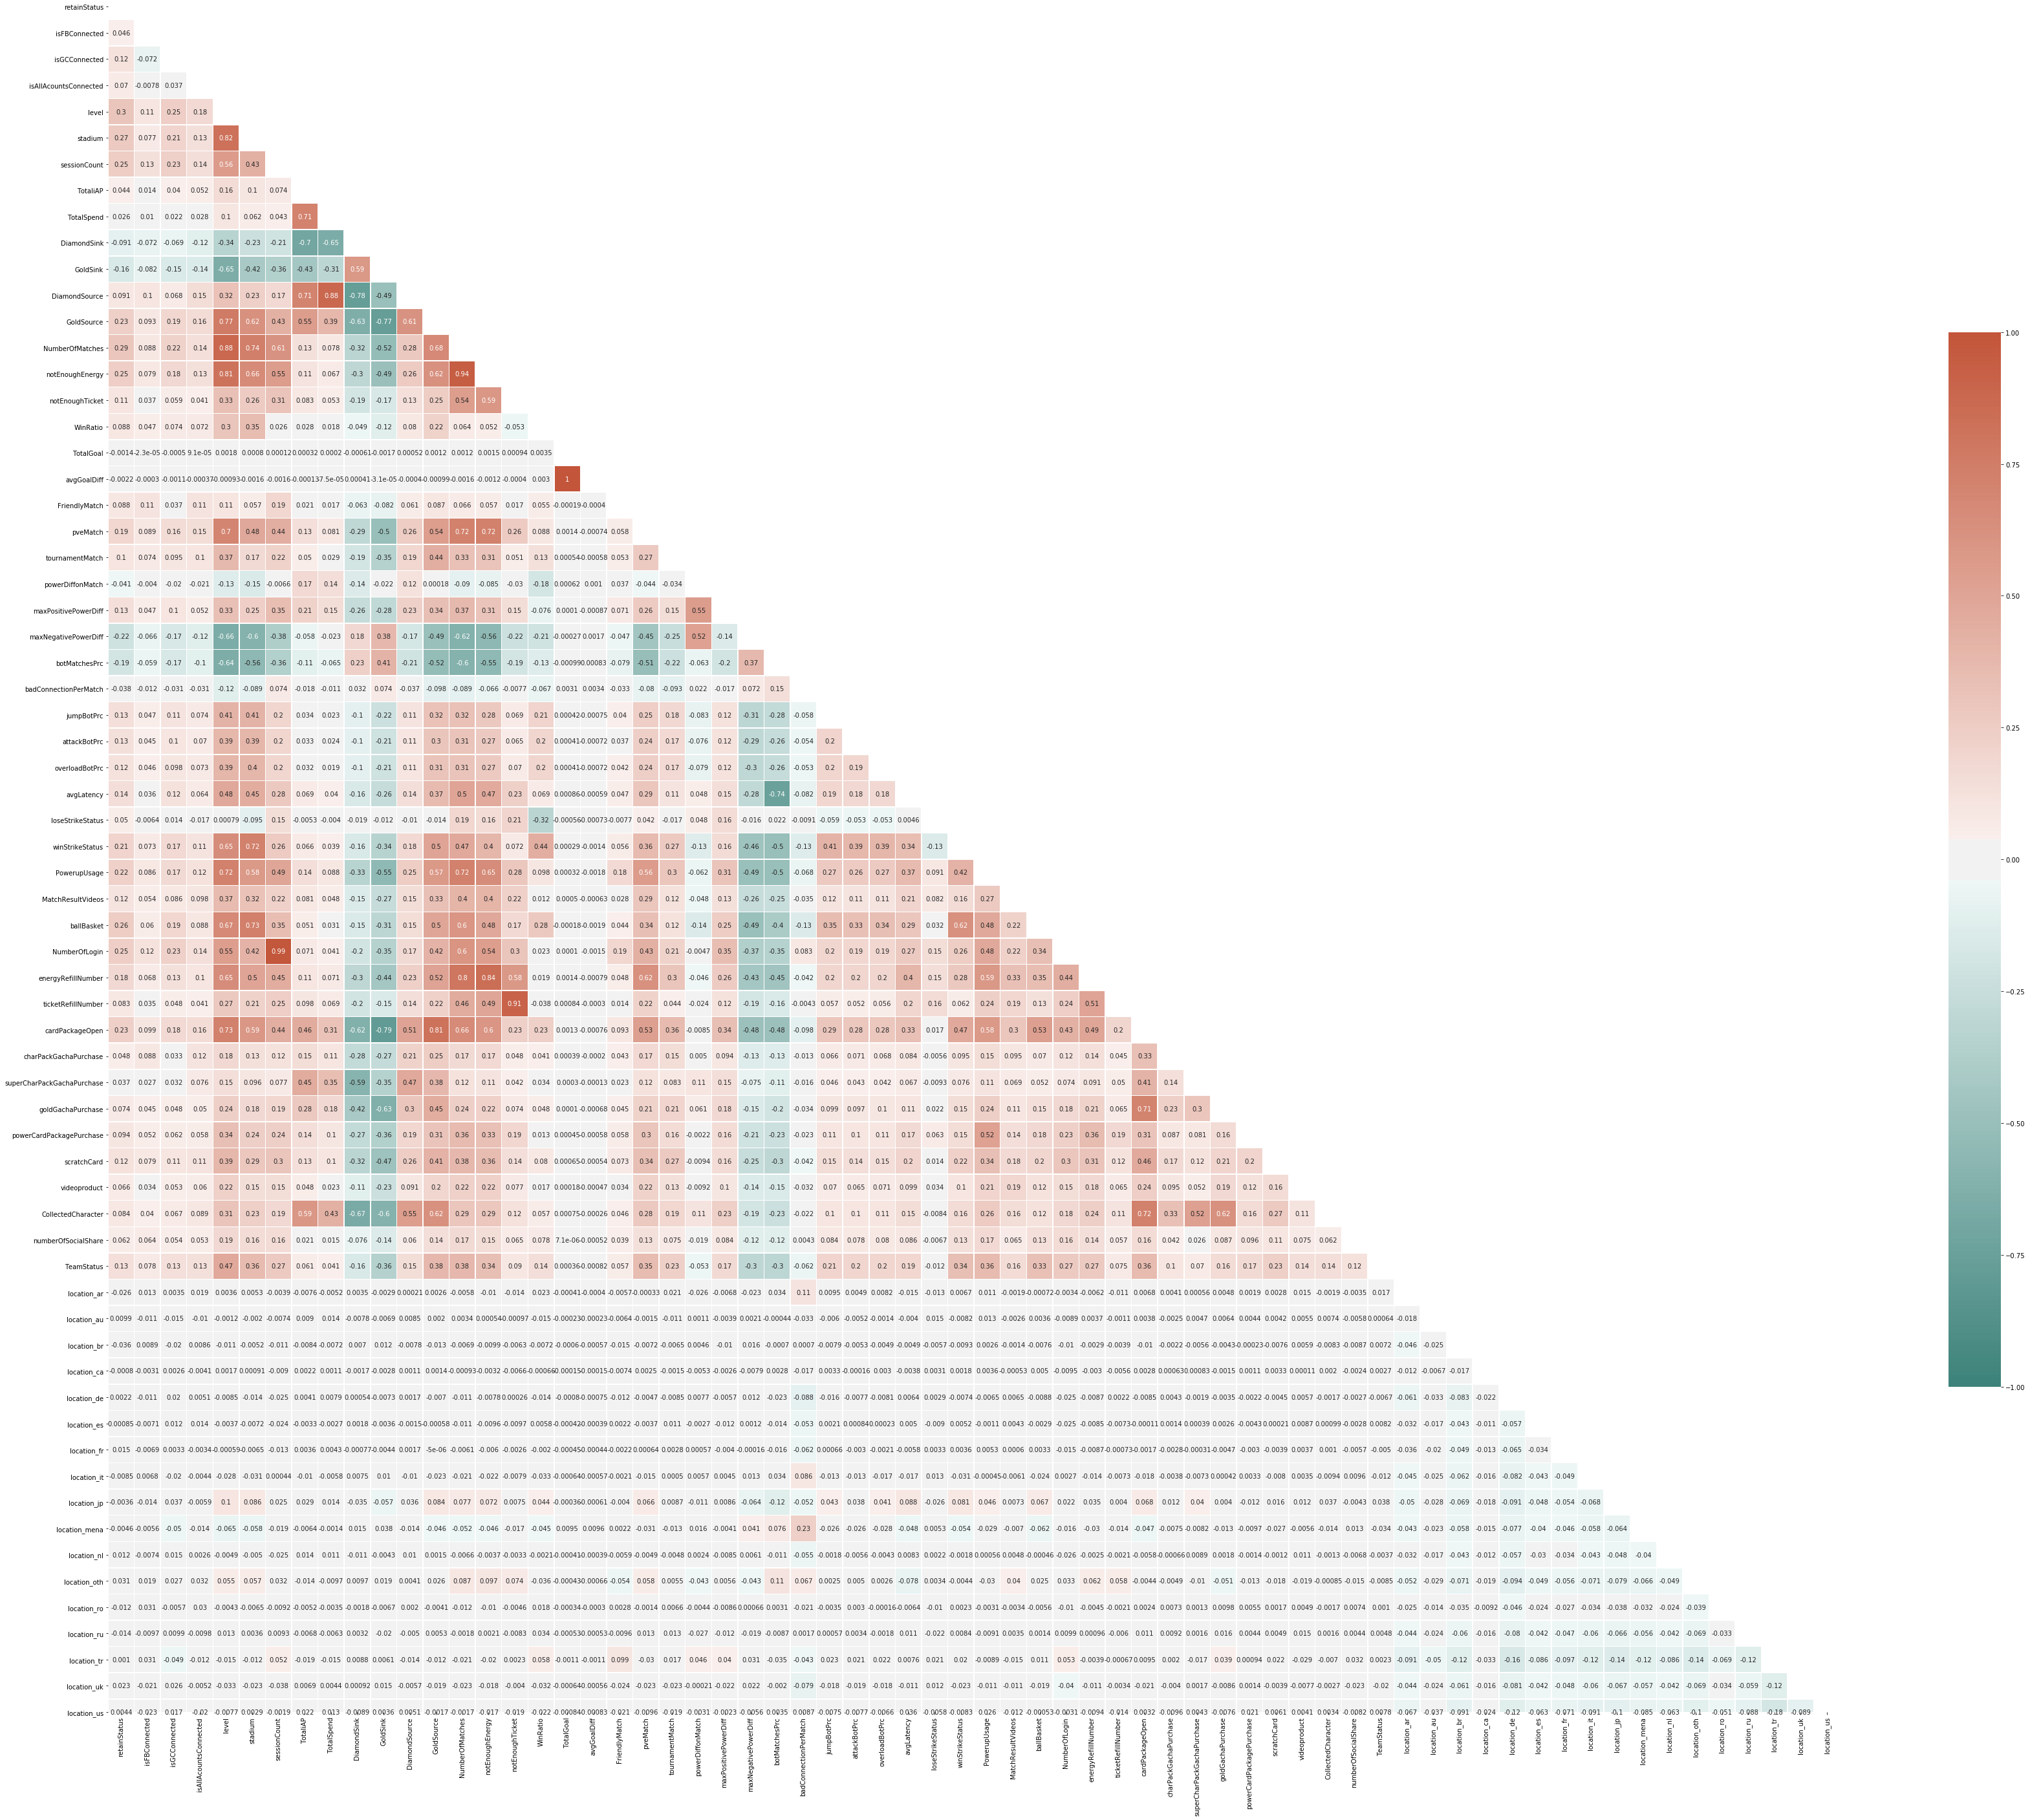

In [36]:
correlation = df.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(60, 60))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

#### The variables by themselves do not have high correlation with retainStatus.
#### The higest one(level) has 0.3 correlation

#### cardPackageOpen powerupUsage, NumberOfMatches, stadium variables are highly correlated with level
#### notEnoughEnergy and notEnoughTicket are also highly correlated with other variables but it affects game play so it might be useful to leave in
#### not sure about GoldSource and diamondSource so I will leave them in as well
#### NumberOfLogin is very highly correlated with sessionCount
#### TotalGoal seems to be perfectly correlated with avgGoalDiff but looking at the data I have no idea how that happened

In [37]:
df[['TotalGoal','avgGoalDiff']]

,TotalGoal,avgGoalDiff
0,15,-3
1,70,7
2,16,4
3,104,5
4,398,1
...,...,...
198857,28,2
198858,31,4
198859,210,2
198860,17,-1


#### I will not remove any variables because of having low correlation with retainSatus, since none of them are highly correlated

In [38]:
X_corr = df.copy()
X_corr = X_corr.drop(['retainStatus','cardPackageOpen', 'PowerupUsage', 'NumberOfMatches', 'stadium', 'NumberOfLogin'], axis=1)
y_corr = df['retainStatus']

* One of the data set's hallmarks is relatively high correlation coefficient score - only score no higher than 0.6 will be considered acceptable.
* Correlation not necceserily means causation, that is why features will not be exluded only for their low correlation with diagnosis (in the heatmap below diagnosis skipped).

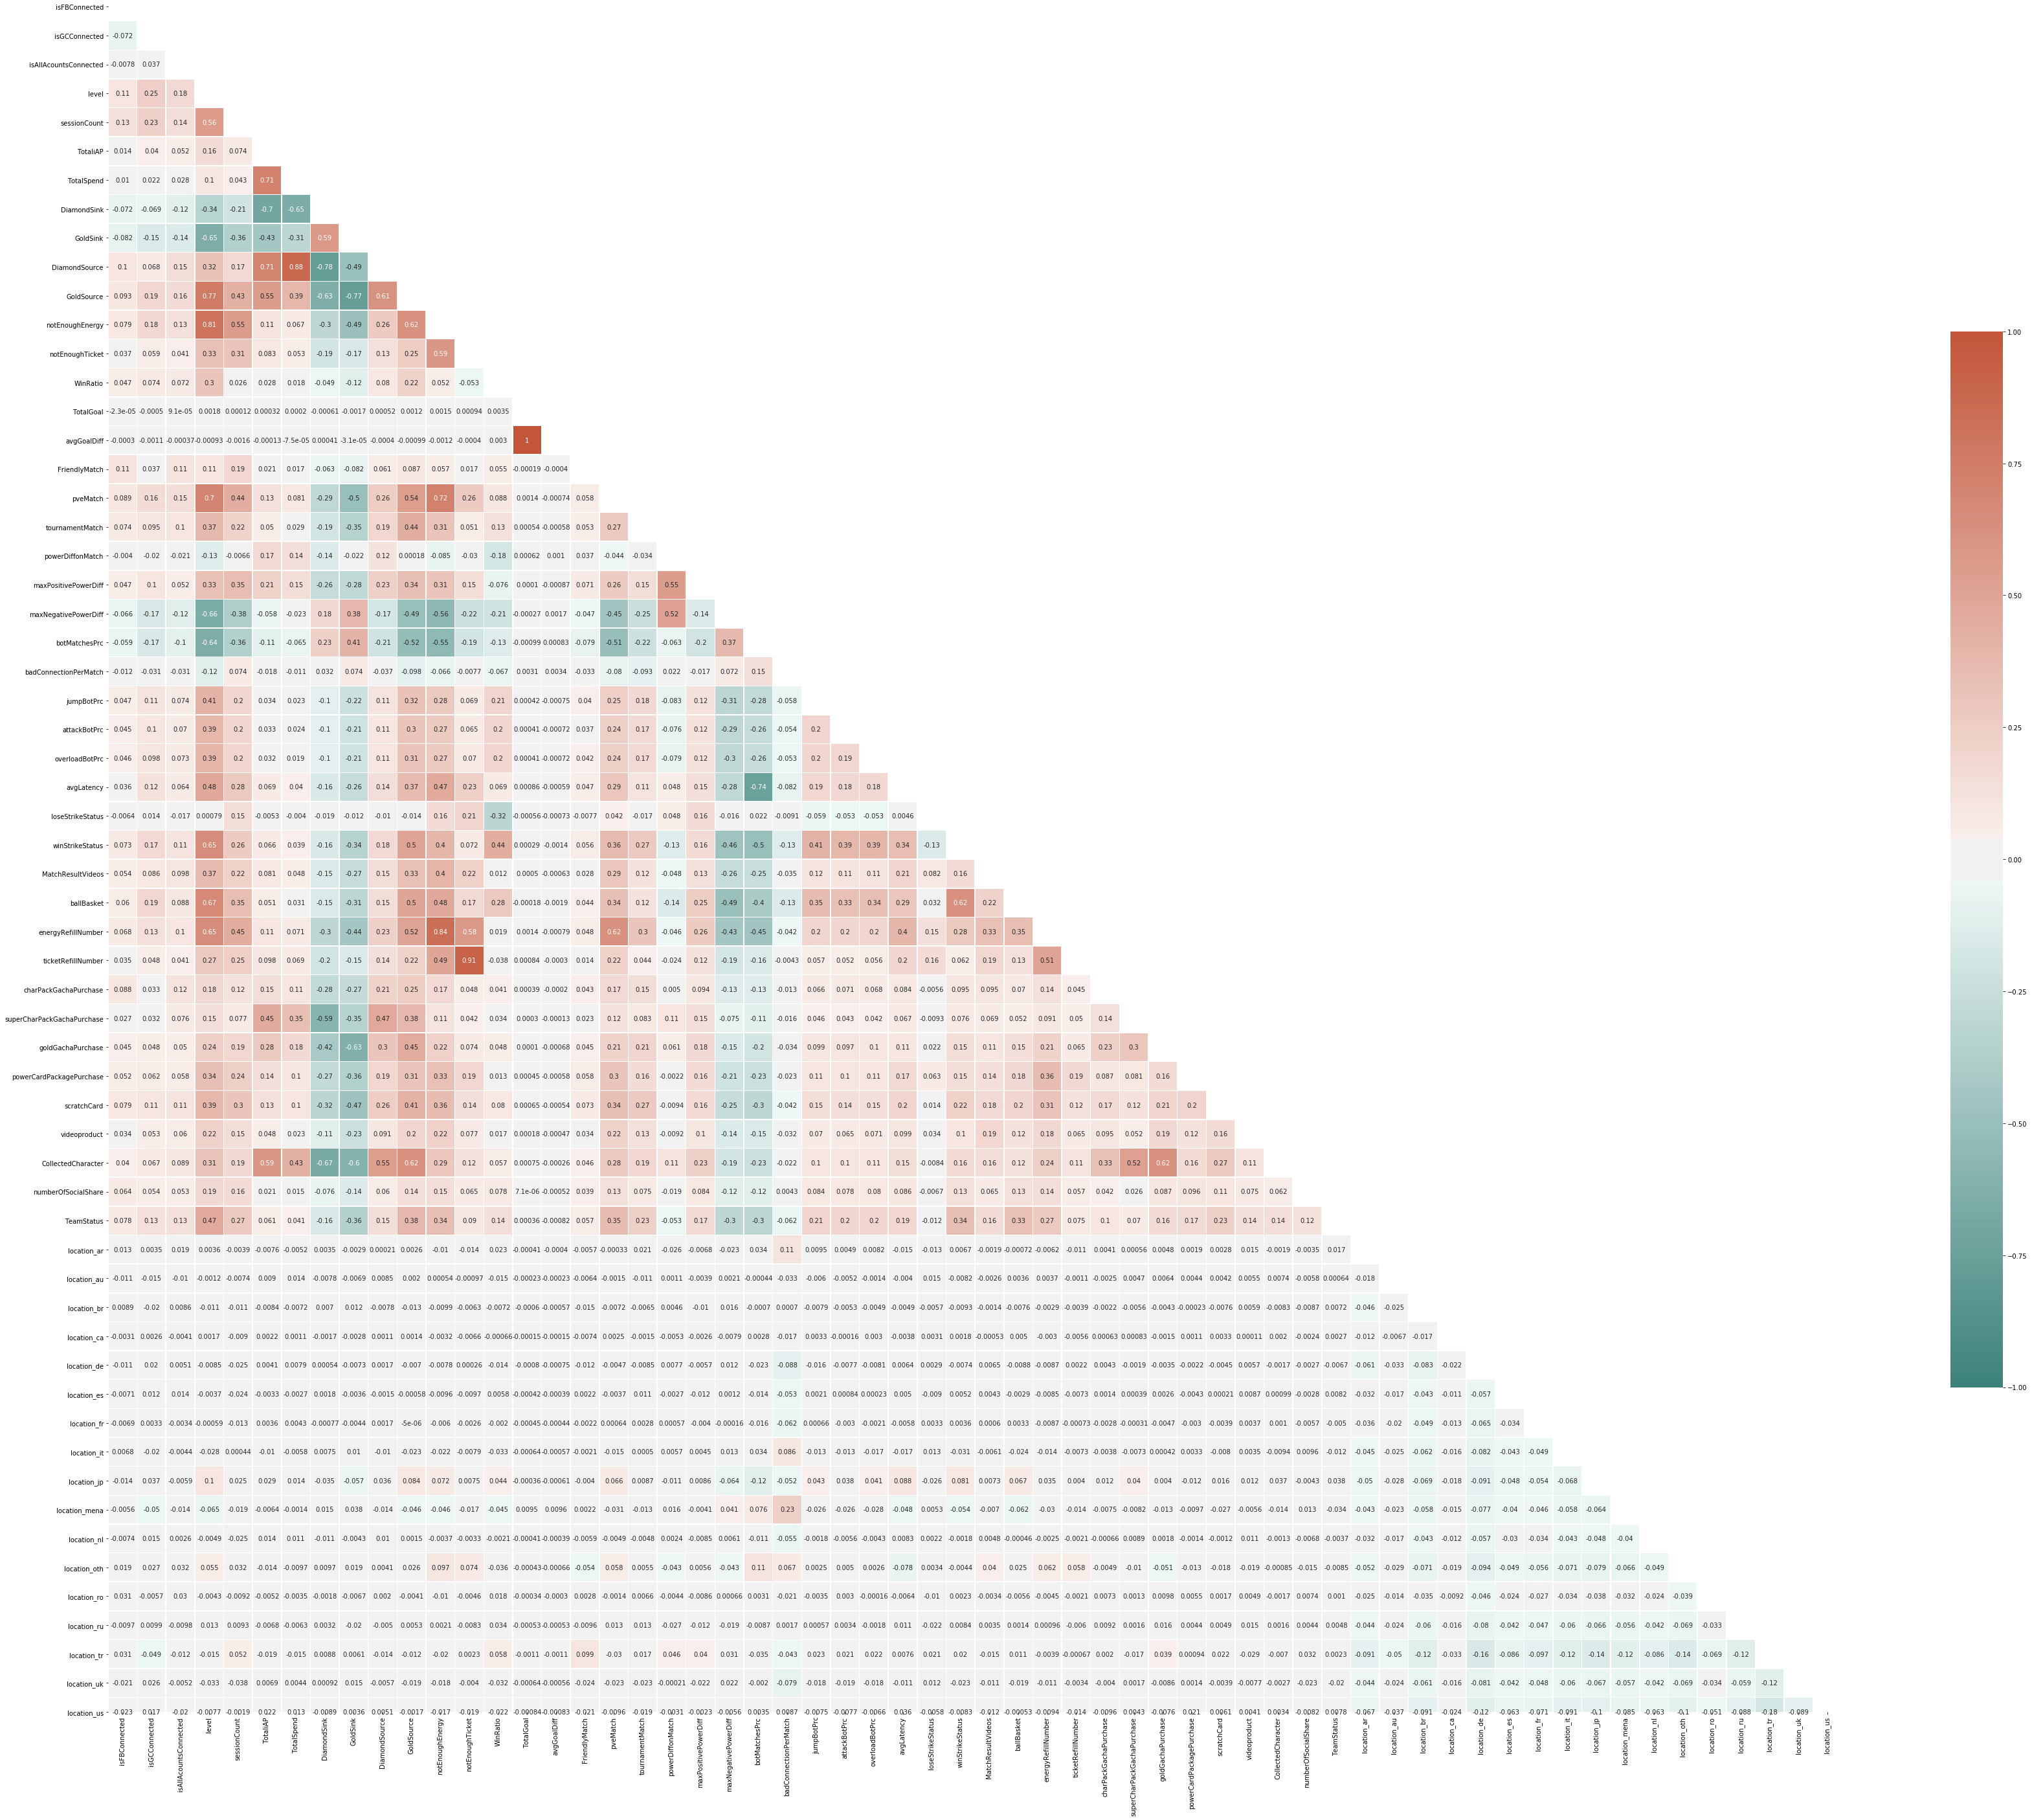

In [39]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(60, 60))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Dividing the dataset into a separate training and test set:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_corr,y_corr,test_size=0.2)

#### Logistic Regression

In [41]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [42]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### XGBoost

In [43]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb_model, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
XG_fit_time = scores['fit_time'].mean()
XG_score_time = scores['score_time'].mean()
XG_accuracy = scores['test_accuracy'].mean()
XG_precision = scores['test_precision_macro'].mean()
XG_recall = scores['test_recall_macro'].mean()
XG_f1 = scores['test_f1_weighted'].mean()
XG_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [44]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [45]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [46]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [47]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [48]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_2"></a>

In [49]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, XG_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, XG_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, XG_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, XG_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, XG_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, XG_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, XG_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
2,XGBoost,6.991756,0.236654,0.651384,0.653191,0.651377,0.650350,0.706294
3,Linear Discriminant Analysis,1.794297,0.062815,0.646814,0.648967,0.646807,0.645530,0.699584
5,Random Forest,28.611865,2.139441,0.630716,0.630806,0.630715,0.630652,0.680947
0,Logistic Regression,2.749221,0.066617,0.628548,0.631314,0.628539,0.626568,0.667389
4,Quadratic Discriminant Analysis,0.903860,0.189045,0.599099,0.647583,0.599064,0.563201,0.681144
7,Bayes,0.232052,0.151635,0.593379,0.656067,0.593341,0.547959,0.683964
6,K-Nearest Neighbors,6.030779,18.373946,0.592587,0.592743,0.592584,0.592412,0.621143
1,Decision Tree,2.552355,0.079782,0.563848,0.563852,0.563848,0.563841,0.562259


## Voting classifier <a class="anchor" id="voting"></a>


Documentation: If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [50]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         xgb_model,
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

### Hard <a class="anchor" id="hard"></a>

In [53]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

### Soft <a class="anchor" id="soft"></a>

In [54]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

### Comparison <a class="anchor" id="sum_3"></a>

In [55]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,0.642185,0.677291,0.515690,0.585545,not applicable
1,Ensembling_soft,0.627855,0.688663,0.439383,0.536479,0.675418


# Linear SVC + SelectFromModel <a class="anchor" id="linear_model"></a>


Documentation: Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection.SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of linear_model.LogisticRegression and svm.LinearSVC for classification.

In [56]:
X.shape

(195044, 64)

In [57]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 65 to 62 features

(195044, 50)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_svc,y,test_size=0.2)

#### Decision Tree

In [59]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [60]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### XGBoost

In [61]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb_model, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
XG_fit_time = scores['fit_time'].mean()
XG_score_time = scores['score_time'].mean()
XG_accuracy = scores['test_accuracy'].mean()
XG_precision = scores['test_precision_macro'].mean()
XG_recall = scores['test_recall_macro'].mean()
XG_f1 = scores['test_f1_weighted'].mean()
XG_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [62]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [63]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [64]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [65]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [66]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_4"></a>

In [67]:
models_sfm  = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, XG_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, XG_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, XG_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, XG_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, XG_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, XG_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, XG_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm .sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
2,XGBoost,6.287928,0.171885,0.648246,0.650161,0.647507,0.646685,0.701140
0,Logistic Regression,1.759497,0.059376,0.646778,0.649477,0.645918,0.644665,0.698160
3,Linear Discriminant Analysis,1.296963,0.062506,0.645573,0.648035,0.644743,0.643596,0.696976
5,Random Forest,22.051504,1.675112,0.622783,0.622725,0.622689,0.622756,0.671255
4,Quadratic Discriminant Analysis,0.525036,0.146885,0.613228,0.638586,0.610690,0.592686,0.678698
7,Bayes,0.162539,0.137485,0.611824,0.639675,0.609181,0.589360,0.677375
6,K-Nearest Neighbors,26.633032,270.699696,0.592233,0.592330,0.591816,0.591662,0.621056
1,Decision Tree,1.687614,0.071883,0.568840,0.568728,0.568571,0.568595,0.558146


# Linear SVC + RFECV <a class="anchor" id="linear_rfecv"></a>


From documentation: Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. RFECV performs RFE in a cross-validation loop to find the optimal number of features.

In [68]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=5).fit(X,y)
X_rfecv = model.transform(X)
X_rfecv.shape #reduction from 65

(195044, 62)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_rfecv,y,test_size=0.2)

#### Logistic Regression

In [70]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [71]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### XGBoost

In [72]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb_model, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
XG_fit_time = scores['fit_time'].mean()
XG_score_time = scores['score_time'].mean()
XG_accuracy = scores['test_accuracy'].mean()
XG_precision = scores['test_precision_macro'].mean()
XG_recall = scores['test_recall_macro'].mean()
XG_f1 = scores['test_f1_weighted'].mean()
XG_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [73]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [74]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [75]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [76]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [77]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_5"></a>

In [78]:
models_rfecv  = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, XG_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, XG_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, XG_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, XG_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, XG_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, XG_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, XG_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv .sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
2,XGBoost,6.816091,0.187510,0.648983,0.650742,0.648360,0.647587,0.701452
0,Logistic Regression,2.243907,0.056248,0.647169,0.649947,0.646404,0.645070,0.699005
3,Linear Discriminant Analysis,1.750118,0.062505,0.645817,0.648138,0.645105,0.643993,0.697549
5,Random Forest,23.948532,1.715753,0.631480,0.631650,0.631192,0.631159,0.678765
4,Quadratic Discriminant Analysis,0.803179,0.184388,0.613209,0.640098,0.610907,0.591891,0.677348
7,Bayes,0.184392,0.153131,0.610017,0.642642,0.607514,0.584362,0.678168
6,K-Nearest Neighbors,26.261184,319.231048,0.590637,0.590787,0.590256,0.590037,0.618623
1,Decision Tree,2.356381,0.081285,0.561989,0.561930,0.561923,0.561977,0.561173


# Tree-based feature selection <a class="anchor" id="tree"></a>


Documentation: Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer).

In [79]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
etc = ExtraTreesClassifier()
etc.fit(X, y)

model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape 

(195044, 19)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_etc,y,test_size=0.2)

#### Logistic Regression

In [81]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#### Decision Tree

In [82]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

#### XGBoost

In [83]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb_model, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
XG_fit_time = scores['fit_time'].mean()
XG_score_time = scores['score_time'].mean()
XG_accuracy = scores['test_accuracy'].mean()
XG_precision = scores['test_precision_macro'].mean()
XG_recall = scores['test_recall_macro'].mean()
XG_f1 = scores['test_f1_weighted'].mean()
XG_roc = scores['test_roc_auc'].mean()

#### Linear Discriminant Analysis

In [84]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

#### Quadratic Discriminant Analysis

In [85]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

#### Random Forest Classifier

In [86]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

#### K-Nearest Neighbors

In [87]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#### Naive Bayes

In [88]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

### Comparison <a class="anchor" id="sum_6"></a>

In [89]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, XG_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, XG_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, XG_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, XG_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, XG_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, XG_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, XG_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
2,XGBoost,3.081461,0.118755,0.643298,0.644587,0.642800,0.642192,0.694047
0,Logistic Regression,0.925074,0.059367,0.640824,0.645157,0.639971,0.637584,0.690349
3,Linear Discriminant Analysis,0.378180,0.053100,0.639523,0.644045,0.638649,0.636112,0.688602
5,Random Forest,21.681663,1.715747,0.618066,0.618040,0.617949,0.617993,0.663768
4,Quadratic Discriminant Analysis,0.128135,0.081255,0.615625,0.640195,0.613644,0.596475,0.675561
7,Bayes,0.071855,0.078161,0.613209,0.646471,0.610966,0.588192,0.678395
6,K-Nearest Neighbors,3.009578,32.067807,0.592348,0.592382,0.592100,0.592036,0.620380
1,Decision Tree,1.300086,0.065633,0.559080,0.558999,0.558956,0.558998,0.553946


# General comparison <a class="anchor" id="third_bullet"></a>

In [91]:
model_general = pd.concat([models_initial['Model'], models_initial['Accuracy'], 
                           models_correlation['Model'],models_correlation['Accuracy'],
                          models_sfm['Model'], models_sfm['Accuracy'],
                          models_rfecv['Model'], models_rfecv['Accuracy'],
                          models_tree['Model'], models_tree['Accuracy'],
                          models_ensembling['Model'], models_ensembling['Accuracy']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Accuracy', 'Correlation', 'Accuracy_corr',
                        'Linear+SFM', 'Accuracy_sfm', 'Linear+RFECV', 'Accuracy_RFECV', 'Extra trees',
                         'Accuracy_trees', 'Voting', 'Accuracy_voting']

model_general.sort_values(by='Accuracy', ascending=False)

,W/out reduction,Accuracy,Correlation,Accuracy_corr,Linear+SFM,Accuracy_sfm,Linear+RFECV,Accuracy_RFECV,Extra trees,Accuracy_trees,Voting,Accuracy_voting
2,XGBoost,0.647951,XGBoost,0.651384,XGBoost,0.648246,XGBoost,0.648983,XGBoost,0.643298,NaN,NaN
0,Logistic Regression,0.646054,Logistic Regression,0.628548,Logistic Regression,0.646778,Logistic Regression,0.647169,Logistic Regression,0.640824,Ensebling_hard,0.642185
3,Linear Discriminant Analysis,0.644983,Linear Discriminant Analysis,0.646814,Linear Discriminant Analysis,0.645573,Linear Discriminant Analysis,0.645817,Linear Discriminant Analysis,0.639523,NaN,NaN
5,Random Forest,0.630128,Random Forest,0.630716,Random Forest,0.622783,Random Forest,0.631480,Random Forest,0.618066,NaN,NaN
4,Quadratic Discriminant Analysis,0.613093,Quadratic Discriminant Analysis,0.599099,Quadratic Discriminant Analysis,0.613228,Quadratic Discriminant Analysis,0.613209,Quadratic Discriminant Analysis,0.615625,NaN,NaN
7,Bayes,0.610735,Bayes,0.593379,Bayes,0.611824,Bayes,0.610017,Bayes,0.613209,NaN,NaN
6,K-Nearest Neighbors,0.589073,K-Nearest Neighbors,0.592587,K-Nearest Neighbors,0.592233,K-Nearest Neighbors,0.590637,K-Nearest Neighbors,0.592348,NaN,NaN
1,Decision Tree,0.558887,Decision Tree,0.563848,Decision Tree,0.568840,Decision Tree,0.561989,Decision Tree,0.559080,Ensembling_soft,0.627855


#### XGBoost with highly correleted features removed looks to be the best fit
#### Let's see the importance of features

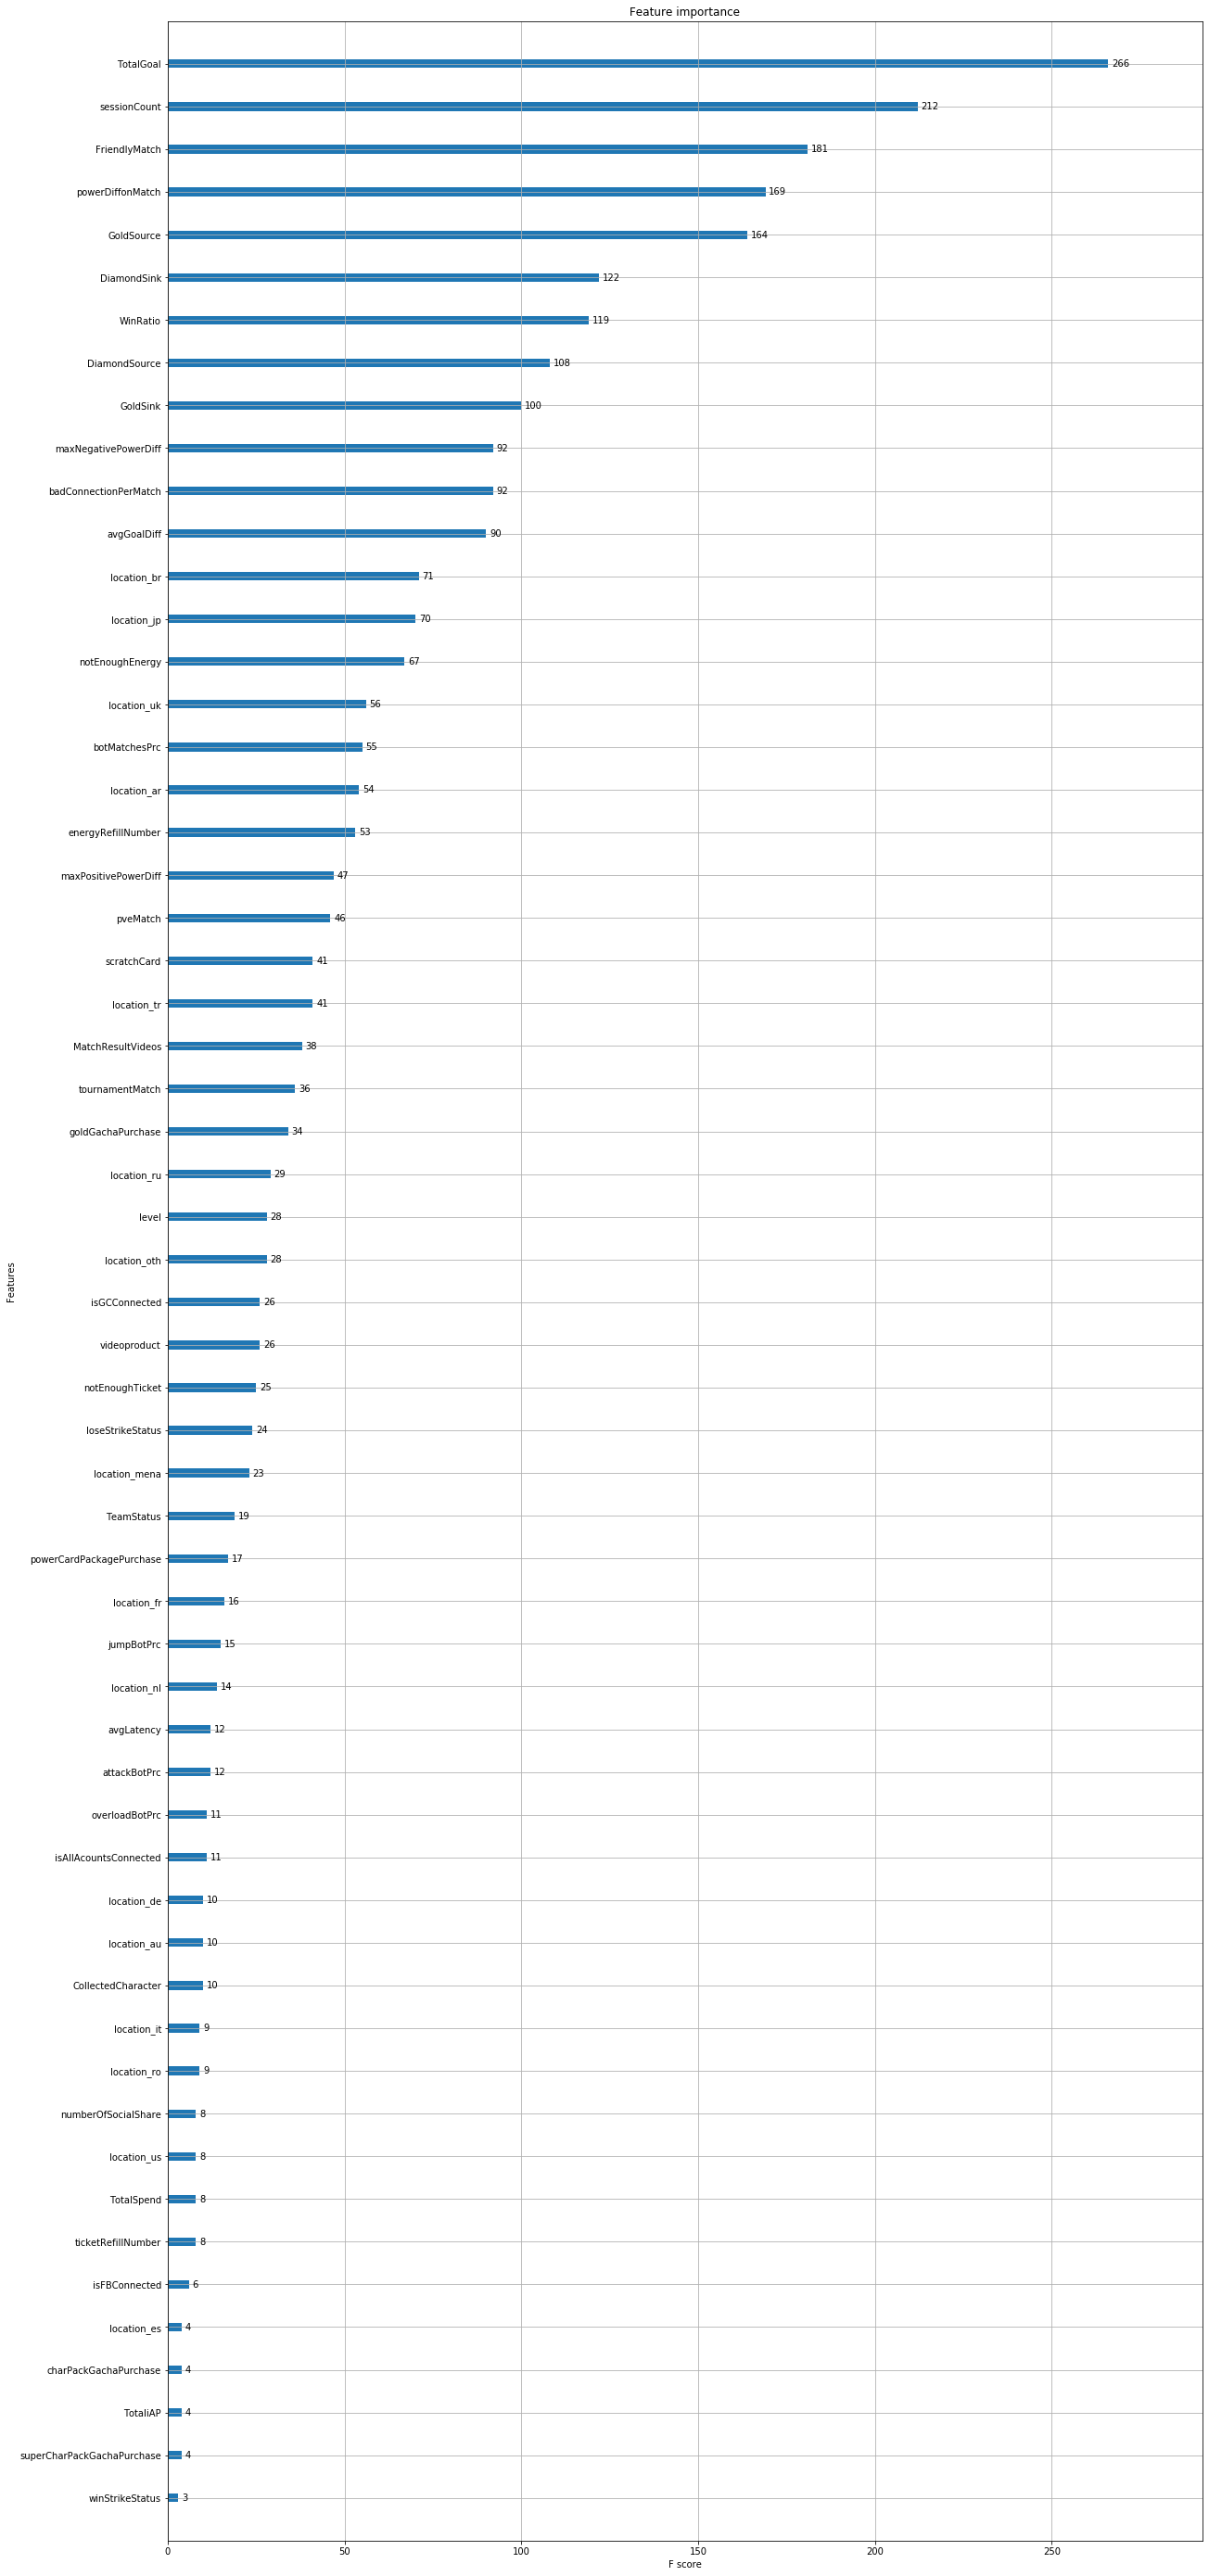

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_corr,y_corr,test_size=0.2)

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

plt.rcParams["figure.figsize"] = (20,50)
plot_importance(xgb_model)

plt.show()